# Day 9: Rope Bridge

In [63]:
test_data = 'R 4\nU 4\nL 3\nD 1\nR 4\nD 1\nL 5\nR 2'.split('\n')
input_data = [line.strip() for line in open('Input\\Day 09.txt')]
data = input_data.copy()

In [64]:
def output(head, tail, visited=None, size=6):
    if visited is None:
        visited = set()
    for y in range(0, size + 1):
        for x in range(0, size):
            if head == (x, size - y):
                print('H', end='')
            elif tail == (x, size - y):
                print('T', end='')
            elif (x, size - y) in visited:
                print('#', end='')
            else:
                print('.', end='')
        print('')
        
def new_pos(pos, direction):
    vectors = {'U': (0, 1), 'R': (1, 0), 'D': (0, -1), 'L': (-1, 0),
               'RU': (1, 1), 'RD': (1, -1), 'LU': (-1, 1), 'LD': (-1, -1)}
    vector = vectors[direction]
    return pos[0] + vector[0], pos[1] + vector[1]

def delta(base, target):
    '''Return P2 position rleative to p1'''
    return target[0] - base[0], target[1] - base[1]

def follow(head, tail):
    actions = {
        # depending on where the head is compared to the tail,
        # decribe tail move required
        (2, -2): 'RD', (1, -2):'RD', (0, -2): 'D', (-1, -2): 'LD', (-2, -2): 'LD',
        (2, -1): 'RD',                                             (-2, -1): 'LD',
        (2,  0): 'R',                                              (-2,  0): 'L',
        (2,  1): 'RU',                                             (-2,  1): 'LU',
        (2,  2): 'RU', (1, 2):'RU',  (0,  2): 'U', (-1,  2): 'LU', (-2,  2): 'LU'}
    offset = delta(tail, head)
    if offset in actions:
        return new_pos(tail, actions[offset])
    else:
        return tail
        
    

## Part 1

In [65]:
%time
head = (0, 0)
tail = (0, 0)
visited = set()

for turn, move in enumerate(data):
    direction, distance = move.split(' ')
    distance = int(distance)
    for i in range(distance):
        head = new_pos(head, direction)
        tail = follow(head, tail)
        visited.add(tail)
    
print(f'Visited:{len(visited)}')

CPU times: total: 0 ns
Wall time: 0 ns
Visited:6030


## Part 2

In [59]:
test_data = ['R 5' ,'U 8', 'L 8', 'D 3', 'R 17', 'D 10', 'L 25', 'U 20']
data = input_data.copy()

In [66]:
%time
knots = 10
head = (0, 0)
tails = [(0, 0) for i in range(knots - 1)]
visited = set()

for turn, move in enumerate(data):
    direction, distance = move.split(' ')
    distance = int(distance)
    for i in range(distance):
        head = new_pos(head, direction)
        for j in range(knots - 1):
            tails[j] = follow(head if j==0 else tails[j - 1], tails[j])
        visited.add(tails[-1])
    
print(f'Visited:{len(visited)}')

CPU times: total: 0 ns
Wall time: 0 ns
Visited:2545


In [61]:
from matplotlib import pyplot as plt

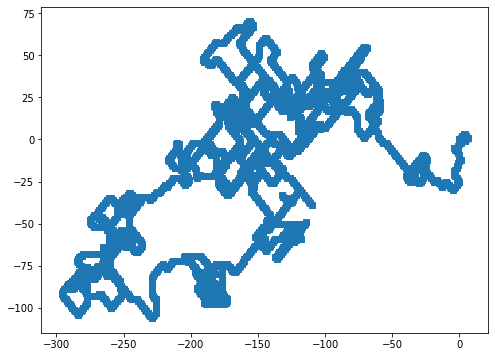

In [62]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(x=[p[0] for p in visited], y=[p[1] for p in visited], marker='s')